In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

Using TensorFlow backend.


In [2]:
model = Sequential()

In [3]:
model.add(Embedding(10000, 32))

In [4]:
model.add(SimpleRNN(32))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential()

In [7]:
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [8]:
model = Sequential()

In [9]:
model.add(Embedding(10000, 32))

In [10]:
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [12]:
max_features = 10000
maxlen = 500
batch_size = 32

In [13]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [14]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

In [15]:
print(input_train.shape, input_test.shape)

(25000, 500) (25000, 500)


In [16]:
from keras.layers import Dense

In [17]:
model = Sequential()

In [18]:
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [20]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.6425 - acc: 0.6135 - val_loss: 0.4942 - val_acc: 0.7680
Epoch 2/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.4100 - acc: 0.8219 - val_loss: 0.4883 - val_acc: 0.7646
Epoch 3/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2927 - acc: 0.8844 - val_loss: 0.4160 - val_acc: 0.8064
Epoch 4/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2163 - acc: 0.9161 - val_loss: 0.3989 - val_acc: 0.8440
Epoch 5/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.1566 - acc: 0.9439 - val_loss: 0.4273 - val_acc: 0.8260
Epoch 6/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1024 - acc: 0.9657 - val_loss: 0.4246 - val_acc: 0.8434
Epoch 7/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.0590 - acc: 0.9818 - val_loss: 0.5400 - val_acc:

In [21]:
import matplotlib.pyplot as plt 

In [22]:
acc = history.history['acc']

In [23]:
val_acc = history.history['val_acc']

In [24]:
loss = history.history['loss']

In [25]:
val_loss = history.history['val_loss']

In [26]:
epochs = range(1, len(acc) + 1)

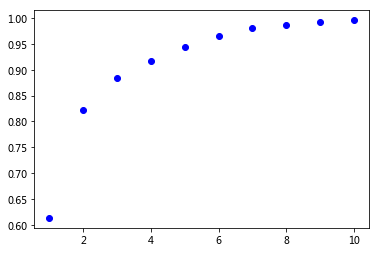

In [27]:
plt.plot(epochs, acc, 'bo', label='Traning acc')

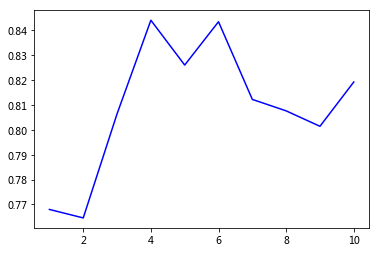

In [28]:
plt.plot(epochs, val_acc, 'b', label='Validation acc')

In [29]:
from keras.layers import LSTM
from keras.layers import Dense

In [30]:
model = Sequential()

In [31]:
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [33]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.5100 - acc: 0.7642 - val_loss: 0.4310 - val_acc: 0.8050
Epoch 2/10
20000/20000 [==============================] - 82s 4ms/step - loss: 0.2936 - acc: 0.8852 - val_loss: 0.4149 - val_acc: 0.8028
Epoch 3/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.2333 - acc: 0.9115 - val_loss: 0.3027 - val_acc: 0.8872
Epoch 4/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.1944 - acc: 0.9279 - val_loss: 0.4839 - val_acc: 0.8538
Epoch 5/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.1749 - acc: 0.9354 - val_loss: 0.4394 - val_acc: 0.8470
Epoch 6/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.1517 - acc: 0.9443 - val_loss: 0.3932 - val_acc: 0.8586
Epoch 7/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.1424 - acc: 0.9495 - val_loss: 0.4441 - val_acc:

In [ ]:
# 使用逆序序列训练并评估一个LSTM
from